# **Chicago Ride-Hailing vs Taxi: Travel Demand & Mode Share Forecasting - Team Assignment**

**QST 843 - Team 8**

* Olivia Chen
* Eric Dahlberg
* Pratik Mahajan
* Brendan Wilcox
* Roxy Zhang

**Problem Definition**

Transportation planners, operators, and policymakers need to understand how demand shifts across ride-hailing and taxis. Understanding and predicting demand enables better supply planning, equitable coverage, and policy decisions, especially under certain weather conditions or event shocks. By gaining a detailed understanding of Chicago’s FHV market dynamics, we will generate insights that can benefit all market participants and hopefully be extrapolated to understand high-level patterns in major cities across the United States.

In this analysis we aim to:

* Identify neighborhoods with the highest concentration of ride share trips

* Compare the trends in TNP trips with taxi trips over time.'

* Examine the pricing components between TNP and taxi base fares, the cost per mile, and cost per minute

* Identify popular trip lengths for TNP and taxi Rides

* Compare trip efficiency between taxi and TNP rides through average speed during the ride

**Data Overview**

Our data comes from The Chicago Data Portal and is composed of 2 datasets,[Transportation Network Providers (Uber/Lyft) - Trips (2018 - 2022)](https://https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips-2018-2022-/m6dm-c72p/about_data) and [Taxi Trips (2013-2023)](https://https://data.cityofchicago.org/Transportation/Taxi-Trips-2013-2023-/wrvz-psew/about_data). The TNP dataset has about 300 million rows of data and the Taxi Trips database has about 212 million rows. The datasets contain information ranging from trip times, miles driven, area in the city where the ride started or ended, fare, tips, pooled ride and more.

*Transportation Network Providers - Trips (2018 - 2022)*

| Column Name | Description | API Field Name | Data Type |
|-------------|-------------|----------------|-----------|
| Trip ID | A unique identifier for the trip. | trip_id | Text |
| Trip Start Timestamp | When the trip started, rounded to the nearest 15 minutes. | trip_start_timestamp | Floating Timestamp |
| Trip End Timestamp | When the trip ended, rounded to the nearest 15 minutes. | trip_end_timestamp | Floating Timestamp |
| Trip Seconds | Time of the trip in seconds. | trip_seconds | Number |
| Trip Miles | Distance of the trip in miles. | trip_miles | Number |
| Pickup Census Tract | The Census Tract where the trip began. This column often will be blank for locations outside Chicago. | pickup_census_tract | Text |
| Dropoff Census Tract | The Census Tract where the trip ended. This column often will be blank for locations outside Chicago. | dropoff_census_tract | Text |
| Pickup Community Area | The Community Area where the trip began. This column will be blank for locations outside Chicago. | pickup_community_area | Number |
| Dropoff Community Area | The Community Area where the trip ended. This column will be blank for locations outside Chicago. | dropoff_community_area | Number |
| Fare | The fare for the trip rounded to the nearest 2.50 dollars. | fare | Number |
| Tip | The tip for the trip rounded to the nearest 1.00 dollar. Cash tips will not be recorded. | tip | Number |
| Additional Charges | The taxes fees and any other charges for the trip. | additional_charges | Number |
| Trip Total | Total cost of the trip. This is calculated as the total of the previous columns including rounding. | trip_total | Number |
| Shared Trip Authorized | Whether the customer agreed to a shared trip with another customer regardless of whether the customer was actually matched for a shared trip. | shared_trip_authorized | Checkbox |
| Trips Pooled | If customers were matched for a shared trip how many trips including this one were pooled. All customer trips from the time the vehicle was empty until it was empty again contribute to this count. | trips_pooled | Number |

*Taxi Trips (2013-2023)*

| Column Name | Description | API Field Name | Data Type |
|-------------|-------------|----------------|-----------|
| Trip ID | A unique identifier for the trip. | trip_id | Text |
| Taxi ID | A unique identifier for the taxi. | taxi_id | Text |
| Trip Start Timestamp | When the trip started, rounded to the nearest 15 minutes. | trip_start_timestamp | Floating Timestamp |
| Trip End Timestamp | When the trip ended, rounded to the nearest 15 minutes. | trip_end_timestamp | Floating Timestamp |
| Trip Seconds | Time of the trip in seconds. | trip_seconds | Number |
| Trip Miles | Distance of the trip in miles. | trip_miles | Number |
| Pickup Census Tract | The Census Tract where the trip began. For privacy, this Census Tract is not shown for some trips. This column often will be blank for locations outside Chicago. | pickup_census_tract | Text |
| Dropoff Census Tract | The Census Tract where the trip ended. For privacy, this Census Tract is not shown for some trips. This column often will be blank for locations outside Chicago. | dropoff_census_tract | Text |
| Pickup Community Area | The Community Area where the trip began. This column will be blank for locations outside Chicago. | pickup_community_area | Number |
| Dropoff Community Area | The Community Area where the trip ended. This column will be blank for locations outside Chicago. | dropoff_community_area | Number |
| Fare | The fare for the trip. | fare | Number |
| Tips | The tip for the trip. Cash tips generally will not be recorded. | tips | Number |
| Tolls | The tolls for the trip. | tolls | Number |
| Extras | Extra charges for the trip. | extras | Number |
| Trip Total | Total cost of the trip, the total of the previous columns. | trip_total | Number |
| Payment Type | Type of payment for the trip. | payment_type | Text |
| Company | The taxi company. | company | Text |
| Pickup Centroid Latitude | The latitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | pickup_centroid_latitude | Number |
| Pickup Centroid Longitude | The longitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | pickup_centroid_longitude | Number |
| Pickup Centroid Location | The location of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | pickup_centroid_location | Point |
| Dropoff Centroid Latitude | The latitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | dropoff_centroid_latitude | Number |
| Dropoff Centroid Longitude | The longitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | dropoff_centroid_longitude | Number |
| Dropoff Centroid Location | The location of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | dropoff_centroid_location | Point |

## **Executive Summary**

We analyze Chicago’s ride-hailing (Uber/Lyft) and taxi trip data (2018–2022) to understand mobility patterns, price patterns and mode share across community areas and time intervals.

Using PySpark, we process millions of trips to extract trends in demand, trip duration, coverage, and price.

Key focus areas include seasonal/time-of-day patterns, differences between TNP and taxi use, and geography-driven preferences.

Findings:

* TNP rides are far more popular than taxi rides, especially since the pandemic

* TNP rides have greater average speed than taxi rides, and are faster on average than taxi rides hinting at more efficent trips and streamlined process

* Neighborhoods Near North Side, Loop, Near West Side, Lake View and O’Hare are the most popular communities for rides.
Taxi Rides are cheaper for shorter rides, with TNP rides charging more upfront, but with longer rides, TNP rides become more cost effective.

* Taxi rides are more commonly used for shorter rides than TNP rides

Early insights show distinct time-based demand peaks, higher reliance on taxis for short rides, and a growing shift toward ride-hailing over time.

## **Exploratory Questions**

*Answered **bold** Questions Only*

1. **How did the number of trips taken vary between Taxi and TNP over the same period? We want to see which mode of transportation was more popular overall.**

*  Answer: Despite some abnormal spikes in TNP’s volume prior to the pandemic, TNP trips were about as popular as Taxis in 2020, then becoming almost 4 times as popular in 2 months, starting in April 2021. Since then, TNPs have slowly gained even more popularity.

2. **How does fare vary across trips of similar length between taxis and TNP? We want to know whether the base pricing differs between the two modes of transportation and, if so, theorize what could be driving these differences.**
    * **Using “Trip Seconds” and “Trip Miles”**

* Answer: TNPs charge more upfront, with a higher base fare of 8.10, while taxis charge significantly less at 3.80. Conversely, Taxis charge more per mile (2.20) and per minute (0.40) than TNPs, with prices at 1.45 per mile and 0.20 per minute. (Include the chart picture)

3. **How does the average trip length (“Trip Miles”) vary between Taxi and TNP? We want to understand whether riders use different modes for different ride types (e.g., short-distance trips within downtown vs. trips from downtown to the airport).**

* Answer: Over 50% of taxi trips are between 0 and 2 miles and steadily decrease in share as the distance increases. About 40% of TNP trips are between 2 and 6 miles, with almost 25% being between 6 and 15 miles.

| Trip Length (miles) | Taxi Share | TNP Share |
|---------------------|------------|-----------|
| 0–2                 | 0.50       | 0.25      |
| 2–6                 | 0.25       | 0.40      |
| 6–15                | 0.15       | 0.25      |
| 15+                 | 0.10       | 0.10      |

4. **What are the most popular pickup and drop-off communities for Taxi and TNP? Based on personal experience, taxis seem to concentrate in known areas (e.g., set up outside airports or sporting events). At the same time, TNPs are popular in these known areas but can also be found consistently anywhere in the metro area.**

* Answer: The 10 most popular communities for pickups and drop offs are: Near North Side, The Loop, Near West Town, Lake View , O’Hare, West Town, Lincoln Park, Logan Square, Near South Side and Uptown.

5. **How efficient are taxi and TNP trips over the same distance? What is the average time of those trips per mile? Historically, taxi drivers are required to be highly knowledgeable about navigating a particular city. We want to see whether this knowledge is superior to the TNPs’ provided GPS and route-optimization algorithms.**

*  Answer: Taxis experience more frequent slow-moving conditions than TNPs do. The majority of TNP rides have high clustering of speeds around 10–48 MPH with a strong drop off of other speeds, while Taxi rides have a more even distribution of speeds with clustering in the 7-48 MPH range, but more distribution towards slower times. These slower times indicating Taxis get to their destinations slower than their TNP competitors, on average.



--------------------------------------------------------------------------------

6. How much revenue (“Trip Total”) was generated by Taxi vs TNP over the same period, and how do they compare in terms of average total revenue per ride? Overall, which mode is more costly for riders? How does this compare for all components of “Trip Total” (What is driving “Trip Total” amounts?)?:
    * “Tip” (Taxi/TNP)
    * “Additional Charges” (TNP)
    * “Tolls” (Taxi)
    * “Extras” (Taxi)

7. How do fares vary between Taxi and TNP for trips of similar length (“Trip Miles”) starting in the same community? We want to understand whether certain communities command different prices than others due to factors such as popularity, events, safety, weather, etc..

8. How do the “Extras” + “Tolls” for taxis compare to the “Additional” charges for TNP?. What % of “Trip Total” do these less transparent charges comprise? We want to see how significantly the two modes lean on ambiguous add-ons to drive “Trip Total”.

9. What times of day are most popular for both modes (“Trip Start Timestamp”)? Is one the preferred mode at different times of day? Potentially, TNPs are preferred in a pinch/in the early morning hours after a night out.

10. How does the time of year impact rider volume between the two modes? Maybe riders are more willing to wait longer/hail taxis in warmer weather while preferring to summon TNPs from the warmth of the indoors during the colder months.

## **Cleaning**

### **Pre-cleaning Tasks**

**Setup and Paths**

In [ ]:
from pyspark.sql import SparkSession, functions as F
import re

spark = SparkSession.builder.getOrCreate()

SHUFFLE_PARTS = 300
READ_INFER_SCHEMA = True

TAXI_PATH  = "gs://qst843-team8-central1/raw/chicago/Taxi/full_snapshot_Taxi.csv"
TNP_PATH   = "gs://qst843-team8-central1/raw/chicago/TNP/full_snapshot_TNP.csv"

OUT_TAXI_PARQUET = "gs://qst843-team8-central1/processed/taxi_clean_parquet"
OUT_TNP_PARQUET  = "gs://qst843-team8-central1/processed/tnp_clean_parquet"

spark.conf.set("spark.sql.shuffle.partitions", str(SHUFFLE_PARTS))

**Load Raw CSVs**

In [ ]:
Taxi = spark.read.option("header", True).option("inferSchema", READ_INFER_SCHEMA).csv(TAXI_PATH)
TNP  = spark.read.option("header", True).option("inferSchema", READ_INFER_SCHEMA).csv(TNP_PATH)

print("Loaded CSV:")
print("Taxi rows (may take time):", Taxi.count())
print("TNP  rows (may take time):", TNP.count())

Loaded CSV:


Taxi rows (may take time): 211670894


TNP  rows (may take time): 192719126


**Helper Functions**

In [ ]:
def to_snake(name: str) -> str:
    name = re.sub(r"[^\w]+", "_", name.strip())
    name = re.sub(r"_+", "_", name)
    return name.strip("_").lower()

def to_title_case(name: str) -> str:
    name = re.sub(r"[_]+", " ", name.strip())
    name = re.sub(r"\s+", " ", name)
    return " ".join([w.capitalize() for w in name.split()])

def rename_with(df, fn):
    return df.select([F.col(c).alias(fn(c)) for c in df.columns])

def drop_if_exists(df, cols):
    keep = [c for c in df.columns if c not in set(cols)]
    return df.select(*keep)

### **Clean Taxi Dataset**

In [ ]:
Taxi = rename_with(Taxi, to_snake)

Taxi = (
    Taxi.withColumn("trip_start_timestamp", F.to_timestamp("trip_start_timestamp", "MM/dd/yyyy hh:mm:ss a"))
        .withColumn("trip_end_timestamp",   F.to_timestamp("trip_end_timestamp",   "MM/dd/yyyy hh:mm:ss a"))
        .withColumn("trip_year", F.year("trip_start_timestamp"))
        .filter(F.col("trip_year").between(2018, 2022))
)

Taxi = drop_if_exists(Taxi, ["pickup_centroid_location", "dropoff_centroid_location"])

from functools import reduce

conds_taxi = [
    F.col("trip_start_timestamp").isNotNull(),
    F.col("trip_end_timestamp").isNotNull(),
    F.col("trip_seconds") > 0,
    F.col("trip_miles") > 0,
    F.col("trip_seconds") < 6 * 3600,   # < 6 hours
    F.col("trip_miles") < 100           # < 100 miles
]

Taxi = Taxi.filter(reduce(lambda a, b: a & b, conds_taxi))

Taxi = Taxi.repartition(200)
Taxi.cache()
print("Taxi cached:", Taxi.is_cached, "| rows:", Taxi.count())

Taxi cached: True | rows: 44340706


### **Clean TNP Dataset**

In [ ]:
TNP = rename_with(TNP, to_snake)

TNP = drop_if_exists(TNP, ["pickup_centroid_location", "dropoff_centroid_location"])

money_cols = ["fare", "tip", "additional_charges", "trip_total"]
for c in money_cols:
    if c in TNP.columns:
        TNP = TNP.withColumn(c, F.regexp_replace(F.col(c).cast("string"), "[$,]", "").cast("double"))

TNP = (
    TNP.withColumn("trip_start_timestamp", F.to_timestamp("trip_start_timestamp", "MM/dd/yyyy hh:mm:ss a"))
       .withColumn("trip_end_timestamp",   F.to_timestamp("trip_end_timestamp",   "MM/dd/yyyy hh:mm:ss a"))
)

conds = [
    F.col("trip_start_timestamp").isNotNull(),
    F.col("trip_end_timestamp").isNotNull(),
    F.col("trip_seconds") > 0,
    F.col("trip_miles") > 0,
    F.col("trip_seconds") < 6*3600,  # less than 6 hours
    F.col("trip_miles") < 100        # < 100 miles
]
from functools import reduce
TNP = TNP.filter(reduce(lambda a, b: a & b, conds))

TNP = TNP.repartition(200)
TNP.cache()
print("TNP cached:", TNP.is_cached, "| rows:", TNP.count())

TNP cached: True | rows: 192566939


**Write Cleaned Data to Parquet and Read it**

In [ ]:

Taxi.coalesce(128).write.mode("overwrite").option("compression", "snappy").parquet(OUT_TAXI_PARQUET)
TNP.coalesce(128).write.mode("overwrite").option("compression", "snappy").parquet(OUT_TNP_PARQUET)

print("Written:")
print("Taxi  ->", OUT_TAXI_PARQUET)
print("TNP   ->", OUT_TNP_PARQUET)

taxi_p = spark.read.parquet(OUT_TAXI_PARQUET)
tnp_p  = spark.read.parquet(OUT_TNP_PARQUET)

print("Reload check complete:")
print("Taxi schema:")
taxi_p.printSchema()
print("\nTNP schema:")
tnp_p.printSchema()

Written:
Taxi  -> gs://qst843-team8-central1/processed/taxi_clean_parquet
TNP   -> gs://qst843-team8-central1/processed/tnp_clean_parquet
Reload check complete:
Taxi schema:
root
 |-- trip_id: string (nullable = true)
 |-- taxi_id: string (nullable = true)
 |-- trip_start_timestamp: timestamp (nullable = true)
 |-- trip_end_timestamp: timestamp (nullable = true)
 |-- trip_seconds: integer (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- pickup_census_tract: long (nullable = true)
 |-- dropoff_census_tract: long (nullable = true)
 |-- pickup_community_area: integer (nullable = true)
 |-- dropoff_community_area: integer (nullable = true)
 |-- fare: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- extras: double (nullable = true)
 |-- trip_total: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- pickup_centroid_latitude: double (nullable = true)
 |-- pickup_

### **Critical Observations**

**TNP Data Incompleteness**

When linking the “TNP” row count stated in the “Data Overview” to the row count shown in the “Cleaning” section, you will see that the overview states TNP has ~300 million rows, while the count shows TNP has only ~192 million rows.

The team did not realize this discrepancy until we reviewed our analysis and decided that proceeding with this portion of our project with the data as is was the best course of action. We saw this incompleteness as a real-world big-data problem with no material impact on the final stage of the project. The notebook currently runs and provides meaningful analysis.

Therefore, the first thing we will do in the next stage of the project is to identify the cause of this problem and extract the data again if we determine that the source does not misrepresent the data size and that the issue was with our extraction operation. We will then run the complete data through our cleaning and EDA from this notebook and include that in the final deliverable.

**Taxi**

* Column names are changed to snake_case_format (e.g., "Trip Start Time" → "trip_start_timestamp")

* Changes timestamps into from string type to timestamp type

* Creates the column "trip_year" and then filters out trips not between 2018 and 2022

* Drop "pickup_centroid_location" and "dropoff_centroid_location" since they provide reduncdant geographical information. Reducing dimensionality, where possible, is helpful for datasets of this size

* Filters out records without start and/or end timestamps
* Filters out trips that are 0 seconds or 0 miles long

* Filters out out "outlier trips," defined as being greater than 6 hours or 100 miles long. It is not that these trips are not real, these trips just have the potential to skew results so they are not reflective of the general trends across Taxi and TNP trips

* The data is then split into 200 partitions for better parallell processing and cached to make subsequent operations more efficient

**TNP**

* Includes all functional cleaning code used for Taxi, tailored to the coneventions of the TNP dataset

* The "money columns" for TNP were problematic as they included "$" and "," which made them strings. These columns were stripped of these string characters and converted to numeric doubles.

## **EDA**

### **Q1: Monthly volume of Taxi versus TNP**

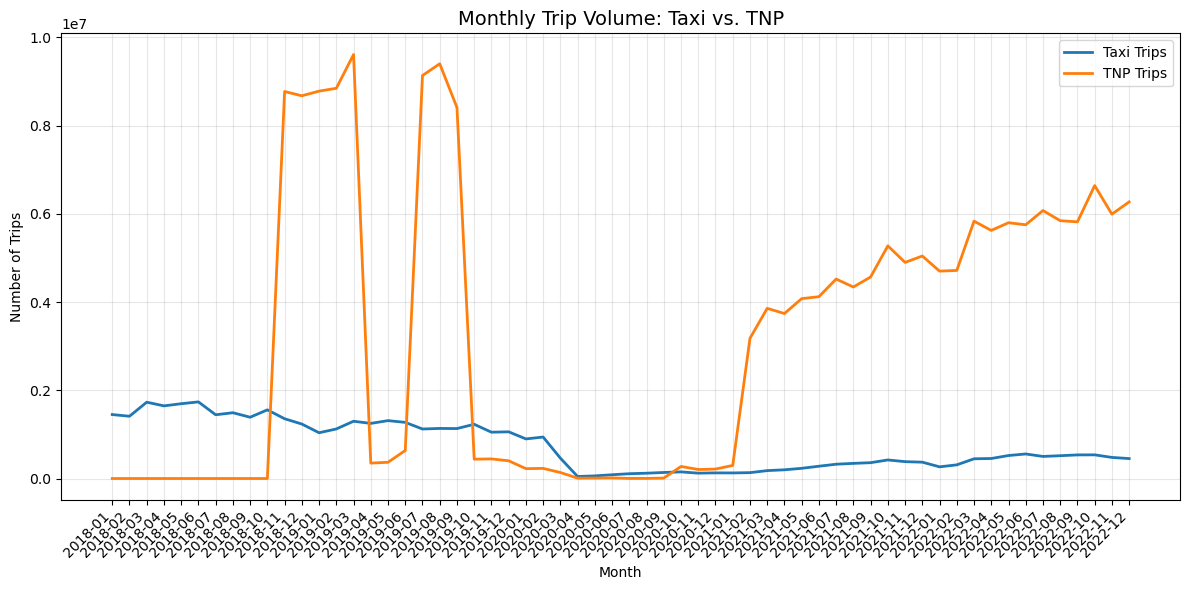

Total Taxi trips: 44,340,706
Total TNP trips:  192,566,939
TNP had more total trips overall during the observed period.


In [ ]:
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt

taxi = spark.read.parquet("gs://qst843-team8-central1/processed/taxi_clean_parquet")
tnp  = spark.read.parquet("gs://qst843-team8-central1/processed/tnp_clean_parquet")

taxi = taxi.withColumn("trip_date", F.to_date("trip_start_timestamp"))
tnp  = tnp.withColumn("trip_date",  F.to_date("trip_start_timestamp"))

taxi_daily = taxi.groupBy("trip_date").agg(F.count("*").alias("taxi_trips"))
tnp_daily  = tnp.groupBy("trip_date").agg(F.count("*").alias("tnp_trips"))

trends = (
    taxi_daily.join(tnp_daily, on="trip_date", how="outer")
              .fillna(0)
              .orderBy("trip_date")
)

pdf = trends.toPandas()

pdf["month"] = pd.to_datetime(pdf["trip_date"]).dt.to_period("M")
monthly = pdf.groupby("month")[["taxi_trips", "tnp_trips"]].sum().reset_index()
monthly["month"] = monthly["month"].astype(str)

plt.figure(figsize=(12,6))
plt.plot(monthly["month"], monthly["taxi_trips"], label="Taxi Trips", linewidth=2)
plt.plot(monthly["month"], monthly["tnp_trips"], label="TNP Trips", linewidth=2)

plt.title("Monthly Trip Volume: Taxi vs. TNP", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

total_taxi = monthly["taxi_trips"].sum()
total_tnp  = monthly["tnp_trips"].sum()

print(f"Total Taxi trips: {total_taxi:,}")
print(f"Total TNP trips:  {total_tnp:,}")

if total_taxi > total_tnp:
    print("Taxi had more total trips overall during the observed period.")
else:
    print("TNP had more total trips overall during the observed period.")

**Analysis**

This graph shows the significant shift in Chicago’s ride-hailing market between 2018 and 2022. *TNP's dominate in the post-pandemic era.*

* There are some abnormal spikes in TNP’s volume prior to the pandemic that we will investigate further in the next phase to determine if this is due to special circumstances or data quality issues. Over this same period, Taxi volume follows a slow, seemingly more realistic, gradual decrease, leading up to the pandemic.

* As expected, both Taxi and TNP saw their volumes near flatline during the peak of the pandemic from roughly 03/2020 to 11/2020, when a slight increase can be seen, coinciding with growing “quarantine fatigue” and the holidays when people started to become more publicly active, even in the face of still-strict social distancing requirements.

* The most notable trend on the entire graph is what happened starting in roughly 03/2021 through the end of the data window: A period when things were starting to look better, peak “quarantine fatigue,” and loosening of restrictions were looking imminent. At this point, Taxi trip volume remained mostly flat, with a subtle increase. In contrast, TNP volume exploded and then steadily increased, creating a massive gap over taxi trips and completely altering the pre-COVID dynamic in which taxis maintained strong, consistent trip volume.

* This post-pandemic changing of the guard can likely be attributed to an increase in TNP drivers (supply) during the pandemic, where individuals sought extra income in the face of unemployment and/or boredom, in conjunction with the explosion and solidification of the platform economy that came during the pandemic, as individuals and companies relied more heavily on digital platforms for daily activities in lieu of venturing into the public. While the easing of restrictions relegated certain platforms to no longer being “necessary,” society’s acceptance of these services through the pandemic made them an ultra-convenient staple of daily life.

### **Q2: Fare difference between Taxi and TNP**

Spark session OK.


Aligned period: 2018-11-01 → 2022-12-31


25/11/04 19:27:52 WARN Instrumentation: [68f7fff9] regParam is zero, which might cause numerical instability and overfitting.
25/11/04 19:28:08 WARN Instrumentation: [20490d63] regParam is zero, which might cause numerical instability and overfitting.


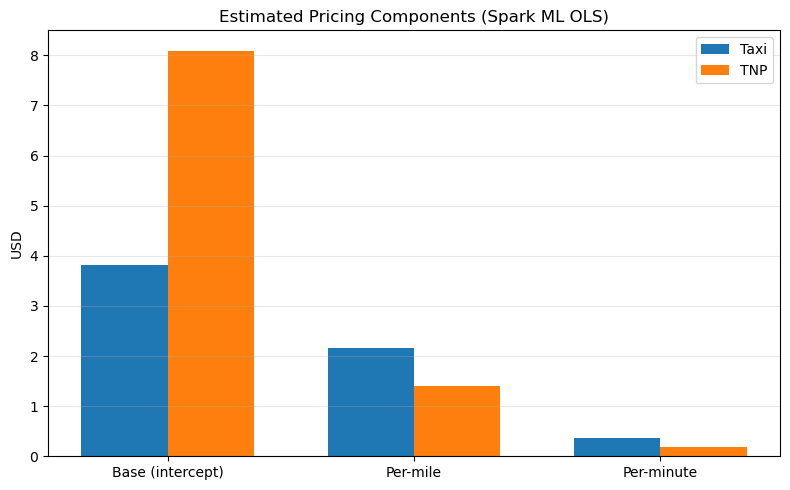

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    _ = spark.range(1).count()
    print("Spark session OK.")
except Exception as e:
    print("Spark died, recreating...", e)
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.getOrCreate()
    print("Spark re-created:", spark.range(1).count())

# --- helpers ---
def ensure_date(df, ts="trip_start_timestamp", out="trip_date"):
    if out not in df.columns:
        df = df.withColumn(out, F.to_date(F.col(ts)))
    return df

def clip_numeric(df, col, lo, hi):
    return df.filter((F.col(col) >= F.lit(lo)) & (F.col(col) <= F.lit(hi)))

def prep(df):
    df = ensure_date(df)
    df = clip_numeric(df, "trip_miles",   0.1, 50.0)
    df = clip_numeric(df, "trip_seconds", 60.0, 7200.0)  # 1–120 minutes
    df = clip_numeric(df, "trip_total",   1.0, 300.0)
    df = df.withColumn("trip_minutes", F.col("trip_seconds")/60.0)
    return df

def align_period(tx, tp):
    t1 = tx.agg(F.min("trip_date").alias("min_d"), F.max("trip_date").alias("max_d")).first()
    t2 = tp.agg(F.min("trip_date").alias("min_d"), F.max("trip_date").alias("max_d")).first()
    start_d = max(t1.min_d, t2.min_d); end_d = min(t1.max_d, t2.max_d)
    return (tx.filter((F.col("trip_date")>=F.lit(start_d)) & (F.col("trip_date")<=F.lit(end_d))),
            tp.filter((F.col("trip_date")>=F.lit(start_d)) & (F.col("trip_date")<=F.lit(end_d))),
            start_d, end_d)

def fmt(x):
    return f"${x:,.2f}"

spark.conf.set("spark.sql.shuffle.partitions", "200")  # keep shuffles modest
taxi0 = prep(taxi_p); tnp0 = prep(tnp_p)
taxi, tnp, start_d, end_d = align_period(taxi0, tnp0)
print(f"Aligned period: {start_d} → {end_d}")

def fit_lr(df, frac=0.03, cap=200_000, seed=7):
    sdf = (df.select("trip_total","trip_miles","trip_minutes")
             .dropna()
             .sample(False, frac, seed)
             .orderBy(F.rand(seed))
             .limit(cap))
    assembler = VectorAssembler(inputCols=["trip_miles","trip_minutes"], outputCol="features")
    vec = assembler.transform(sdf).select("features", F.col("trip_total").alias("label"))
    lr  = LinearRegression(featuresCol="features", labelCol="label", maxIter=50, regParam=0.0, elasticNetParam=0.0, fitIntercept=True)
    return lr.fit(vec)

tx_model = fit_lr(taxi)
tp_model = fit_lr(tnp)

alpha_tx = float(tx_model.intercept); beta_m_tx, beta_t_tx = map(float, tx_model.coefficients)
alpha_tp = float(tp_model.intercept); beta_m_tp, beta_t_tp = map(float, tp_model.coefficients)

labels = ["Base (intercept)", "Per-mile", "Per-minute"]
taxi_vals = [alpha_tx, beta_m_tx, beta_t_tx]
tnp_vals  = [alpha_tp,  beta_m_tp, beta_t_tp]

x = np.arange(len(labels)); w = 0.35
plt.figure(figsize=(8,5))
plt.bar(x - w/2, taxi_vals, width=w, label="Taxi")
plt.bar(x + w/2, tnp_vals,  width=w, label="TNP")
plt.xticks(x, labels)
plt.title("Estimated Pricing Components (Spark ML OLS)")
plt.ylabel("USD")
plt.legend(); plt.grid(alpha=0.3, axis="y"); plt.tight_layout(); plt.show()

base_who    = "Taxi" if alpha_tx > alpha_tp else "TNP"
permile_who = "Taxi" if beta_m_tx  > beta_m_tp else "TNP"
permin_who  = "Taxi" if beta_t_tx  > beta_t_tp else "TNP"

**Analysis**

This graph shows the breakdown of pricing (\$) between Taxis and TNPs. First TNPs charge more upfront, with a higher base fare of \~8.10, while taxis charge significantly less at \~3.80. Conversely, Taxis charge more per mile (\~2.20) and per minute (\~0.40) than TNPs, with prices at \~1.45 per mile and ~0.20 per minute.

We found that using a simple linear regression to demonstrate total cost differences and the breakdown of that cost was most effective, as the additional charges between the two modes were not uniform. This provides a simple way to blend those additional charges together and accurately compare the total cost.

With this model, we can forecast trip cost based on a combination of base fare, trip distance, and trip time. Using the constants above and assuming an average urban travel speed of 15 mph, one can compare the costs of the different modes at varying distances and times. i.e., 1 mile TNP trip = 8.10 \+ (1 mile \* 1.45 ) \+ (4 min \* 0.20). The varying costs of trips between 1 and 20 miles can be seen in the table below:

*Total Trip Costs ($) by Distance & Time*

| Miles | Minutes | Taxi Cost | TNP Cost | Cheaper Option |
|-------|---------|-----------|----------|----------------|
| 1     | 4       | 7.60     | 10.05   | Taxi (saves 2.45) |
| 2     | 8       | 10.00    | 12.30   | Taxi (saves 2.30) |
| 5     | 20      | 17.80    | 19.45   | Taxi (saves 1.65) |
| 10    | 40      | 29.80    | 30.60   | Taxi (saves 0.80) |
| 15    | 60      | 41.80    | 41.75   | Equal |
| 20    | 80      | 53.80    | 52.90   | TNP (saves 0.90) |

From a cost perspective, Taxis are the better option, especially since Q3 shows the majority of trips across modes are 6 miles or less (An expected dynamic in an urban setting). Given that Taxis are cheaper for trips of 15 miles or less, it is clearly the cheaper mode of urban transportation in Chicago.

However, given that Q1 shows TNPs command exponentially higher volume than Taxis in the post-pandemic era, customers are evidently not persuaded by the “savings” provided by Taxis. This is likely for two reasons:

1. While Taxis are cheaper up to 15 miles, the difference is small and diminishes with every increase in distance. Say a 1-mile taxi trip was 5.00 compared to a TNP’s 10.05, that 5.05 savings carries much more weight than the existing 2.45. Even more, this 2.45 is the maximum savings that can be achieved, so racking up
significant savings by choosing taxis would require many trips.

2. People are willing to pay more for convenience, and they do not have to pay *that much* more for it. While a rider may be able to save 2.45 by taking a taxi 1 mile, if it takes 10 minutes to locate a taxi, the user could pay a little to have the TNP arrive sooner while knowing its exact ETA. These days, convenience is everything, and for many people who are already willing to pay for a car to drive them somewhere, time is money, explaining why we see TNPs' volume taking off relative to taxis amid generally higher costs.


### **Q3: Variation in Trip Distance between Taxis and TNPs**

=== Overall trip-length stats (miles) ===
mode     trips  mean_miles  median_miles  p10   p90
 TNP 192345998    6.512400           3.9 1.10 16.40
Taxi  44129280    4.783874           1.8 0.58 16.28


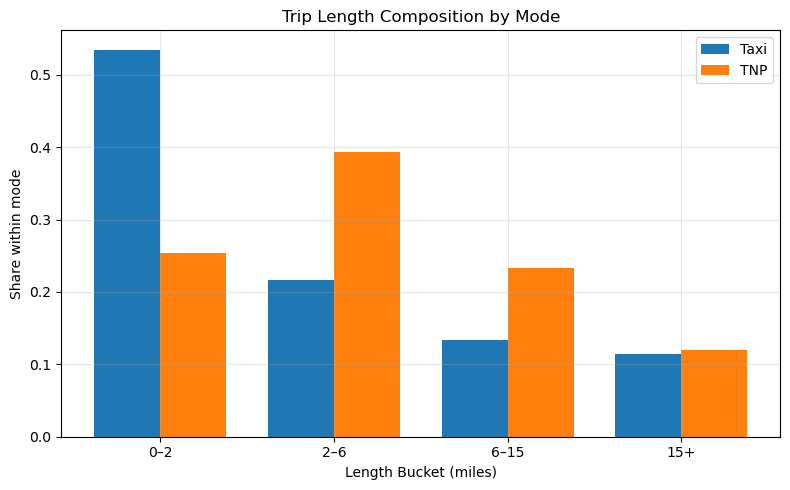

In [ ]:
from pyspark.sql import functions as F
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TAXI_PARQUET = "gs://qst843-team8-central1/processed/taxi_clean_parquet"
TNP_PARQUET  = "gs://qst843-team8-central1/processed/tnp_clean_parquet"

MIN_MILES = 0.1
MAX_MILES = 50.0

# histogram bin width and cap for plot A
BIN_WIDTH = 0.5
MAX_BIN_EDGE = 20.0

COMMUNITY_CANDIDATES = ["pickup_community_area", "pickup_community", "community_area", "pickup_area"]

taxi = spark.read.parquet(TAXI_PARQUET)
tnp  = spark.read.parquet(TNP_PARQUET)

def pick_first_existing(df, candidates):
    cols = set([c.lower() for c in df.columns])
    for c in candidates:
        if c.lower() in cols:
            return c
    return None

trip_miles_col_taxi = pick_first_existing(taxi, ["trip_miles"])
trip_miles_col_tnp  = pick_first_existing(tnp,  ["trip_miles"])
if not trip_miles_col_taxi or not trip_miles_col_tnp:
    raise ValueError("Cannot find 'trip_miles' column in Taxi/TNP data.")

community_col_taxi = pick_first_existing(taxi, COMMUNITY_CANDIDATES)
community_col_tnp  = pick_first_existing(tnp,  COMMUNITY_CANDIDATES)

def prep(df, mode_name, miles_col, community_col):
    base = (df
            .withColumn("trip_miles", F.col(miles_col).cast("double"))
            .filter((F.col("trip_miles") >= MIN_MILES) & (F.col("trip_miles") <= MAX_MILES))
            .select("trip_miles", *( [community_col] if community_col else [] ))
           )
    if community_col:
        base = base.withColumnRenamed(community_col, "community")
    else:
        base = base.withColumn("community", F.lit("Unknown"))
    return base.withColumn("mode", F.lit(mode_name))

taxi_s = prep(taxi, "Taxi", trip_miles_col_taxi, community_col_taxi)
tnp_s  = prep(tnp,  "TNP",  trip_miles_col_tnp,  community_col_tnp)
both   = taxi_s.unionByName(tnp_s)

overall = (both.groupBy("mode")
           .agg(
               F.count("*").alias("trips"),
               F.avg("trip_miles").alias("mean_miles"),
               F.expr("percentile_approx(trip_miles, 0.5)").alias("median_miles"),
               F.expr("percentile_approx(trip_miles, 0.1)").alias("p10"),
               F.expr("percentile_approx(trip_miles, 0.9)").alias("p90")
           )
          ).toPandas().sort_values("mode")
print("=== Overall trip-length stats (miles) ===")
print(overall.to_string(index=False))

def bucket_expr(miles_col):
    return (F.when((F.col(miles_col) < 2), F.lit("0–2"))
              .when((F.col(miles_col) >= 2) & (F.col(miles_col) < 6), F.lit("2–6"))
              .when((F.col(miles_col) >= 6) & (F.col(miles_col) < 15), F.lit("6–15"))
              .otherwise(F.lit("15+"))
           )

both_buck = both.withColumn("len_bucket", bucket_expr("trip_miles"))
bucket_counts = (both_buck.groupBy("mode", "len_bucket").agg(F.count("*").alias("cnt")))
totals2 = bucket_counts.groupBy("mode").agg(F.sum("cnt").alias("total"))
bucket_share = (bucket_counts.join(totals2, on="mode", how="inner")
                .withColumn("share", F.col("cnt")/F.col("total"))
               )

bucket_pdf = (bucket_share
              .groupBy("len_bucket")
              .pivot("mode")
              .agg(F.first("share"))
              .toPandas()
             ).fillna(0.0)

bucket_order = ["0–2", "2–6", "6–15", "15+"]
bucket_pdf = bucket_pdf.set_index("len_bucket").reindex(bucket_order).reset_index()

plt.figure(figsize=(8,5))
x = np.arange(len(bucket_pdf))
width = 0.38
if "Taxi" in bucket_pdf.columns and "TNP" in bucket_pdf.columns:
    plt.bar(x - width/2, bucket_pdf["Taxi"].values, width, label="Taxi")
    plt.bar(x + width/2, bucket_pdf["TNP"].values, width, label="TNP")
elif "Taxi" in bucket_pdf.columns:
    plt.bar(x, bucket_pdf["Taxi"].values, width, label="Taxi")
elif "TNP" in bucket_pdf.columns:
    plt.bar(x, bucket_pdf["TNP"].values, width, label="TNP")

plt.title("Trip Length Composition by Mode")
plt.xlabel("Length Bucket (miles)")
plt.ylabel("Share within mode")
plt.xticks(x, bucket_order)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis**

From this graph, we see that across modes, the majority of trips are between 0 and 6 miles, with Taxi trips having a median of 1.8 miles and TNPs having a median of 3.9 miles.

However, the spread within the modes is different:

* *Taxi*: Over 50% of taxi trips are between 0 and 2 miles and steadily decrease in share as the distance increases. This is likely because taxis are concentrated in the more densely populated and traveled areas of the city's heart, where they can easily and frequently pick up passengers looking to travel short distances. Given that taxis are less likely to patrol less-populated areas on the outskirts or in the suburbs, longer trips to these areas are infrequent, and even less so from them.

* *TNP*: 40% of TNP trips are between 2 and 6 miles, with almost 25% being between 6 and 15 miles. This trend is likely the inverse of Taxis: Riders away from the most trafficked areas are aware that they are unlikely to hail a taxi on the street, but can easily summon a nearby TNP to efficiently traverse the city without waiting for an elusive Taxi.

Again, this trend exemplifies how riders value TNPs' convenience and reliability. The ability of TNPs to easily accommodate rides of all distances and in many locations expands the addressable geographic market of cars for hire, increasing their high volume. Subsequently, even if riders find themselves in areas flush with Taxis, they still frequently turn to their reliable TNPs because they are accustomed to them and know what they are getting.


### **Q4: Popular Pickup Locations for Taxis and TNPs**

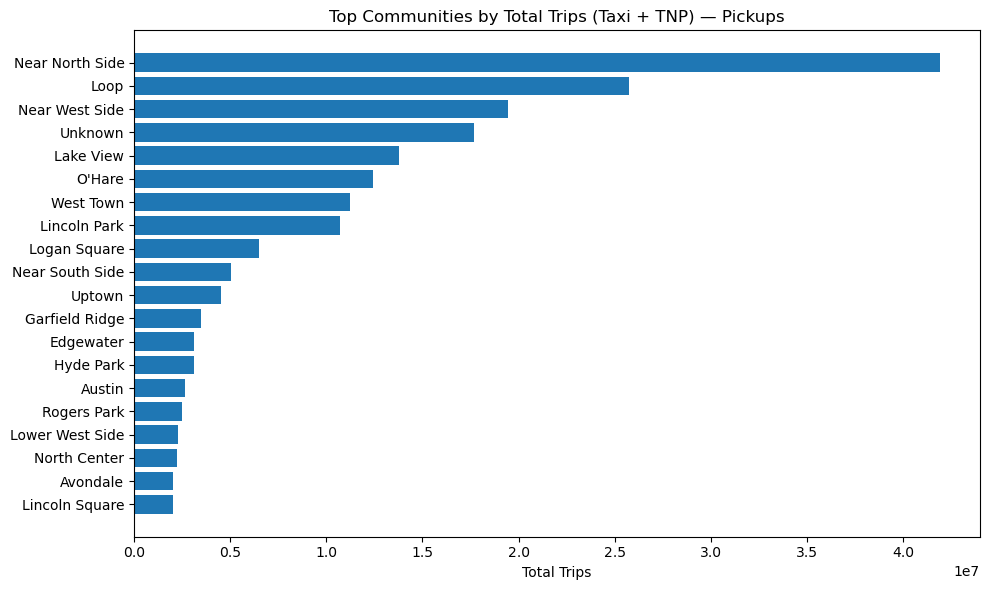

In [ ]:
from pyspark.sql import functions as F, types as T
import pandas as pd
import matplotlib.pyplot as plt

TOP_N = 20
PICKUP_CANDS  = ["pickup_community_area","pickup_community","community_area_pickup","pickup_area"]
DROPOFF_CANDS = ["dropoff_community_area","dropoff_community","community_area_dropoff","dropoff_area"]

community_map_list = [
    (1,"Rogers Park"),(2,"West Ridge"),(3,"Uptown"),(4,"Lincoln Square"),(5,"North Center"),
    (6,"Lake View"),(7,"Lincoln Park"),(8,"Near North Side"),(9,"Edison Park"),(10,"Norwood Park"),
    (11,"Jefferson Park"),(12,"Forest Glen"),(13,"North Park"),(14,"Albany Park"),(15,"Portage Park"),
    (16,"Irving Park"),(17,"Dunning"),(18,"Montclare"),(19,"Belmont Cragin"),(20,"Hermosa"),
    (21,"Avondale"),(22,"Logan Square"),(23,"Humboldt Park"),(24,"West Town"),(25,"Austin"),
    (26,"West Garfield Park"),(27,"East Garfield Park"),(28,"Near West Side"),(29,"North Lawndale"),
    (30,"South Lawndale"),(31,"Lower West Side"),(32,"Loop"),(33,"Near South Side"),
    (34,"Armour Square"),(35,"Douglas"),(36,"Oakland"),(37,"Fuller Park"),(38,"Grand Boulevard"),
    (39,"Kenwood"),(40,"Washington Park"),(41,"Hyde Park"),(42,"Woodlawn"),(43,"South Shore"),
    (44,"Chatham"),(45,"Avalon Park"),(46,"South Chicago"),(47,"Burnside"),(48,"Calumet Heights"),
    (49,"Roseland"),(50,"Pullman"),(51,"South Deering"),(52,"East Side"),(53,"West Pullman"),
    (54,"Riverdale"),(55,"Hegewisch"),(56,"Garfield Ridge"),(57,"Archer Heights"),(58,"Brighton Park"),
    (59,"McKinley Park"),(60,"Bridgeport"),(61,"New City"),(62,"West Elsdon"),(63,"Gage Park"),
    (64,"Clearing"),(65,"West Lawn"),(66,"Chicago Lawn"),(67,"West Englewood"),(68,"Englewood"),
    (69,"Greater Grand Crossing"),(70,"Ashburn"),(71,"Auburn Gresham"),(72,"Beverly"),
    (73,"Washington Heights"),(74,"Mount Greenwood"),(75,"Morgan Park"),(76,"O'Hare"),(77,"Edgewater")
]
map_df = spark.createDataFrame(community_map_list, "community_id int, community_name string")

def pick_col(df, cands):
    lc = {c.lower(): c for c in df.columns}
    for c in cands:
        if c.lower() in lc: return lc[c.lower()]
    return None

def add_name(df, raw_col):
    df1 = df.withColumn("raw_str", F.col(raw_col).cast("string"))
    df1 = df1.withColumn("raw_int", F.when(F.col("raw_str").rlike(r"^[0-9]+$"), F.col("raw_str").cast("int")))
    df1 = (df1.join(map_df, df1.raw_int == map_df.community_id, "left")
              .withColumn("community_name",
                          F.coalesce(F.col("community_name"), F.col("raw_str")))
              .withColumn("community_name",
                          F.when(F.col("community_name").isNull(), F.lit("Unknown"))
                           .otherwise(F.col("community_name")))
              .drop("raw_int","community_id"))
    return df1

use_pickup = True

taxi_col  = pick_col(taxi,  PICKUP_CANDS if use_pickup else DROPOFF_CANDS)
tnp_col   = pick_col(tnp,   PICKUP_CANDS if use_pickup else DROPOFF_CANDS)
assert taxi_col and tnp_col, "Cannot find community columns."

taxi_named = add_name(taxi, taxi_col)
tnp_named  = add_name(tnp,  tnp_col)

taxi_counts = (taxi_named.groupBy("community_name")
               .agg(F.count("*").alias("taxi_trips")))
tnp_counts  = (tnp_named.groupBy("community_name")
               .agg(F.count("*").alias("tnp_trips")))

combo = (taxi_counts.join(tnp_counts, on="community_name", how="outer")
                     .fillna(0)
                     .withColumn("total", F.col("taxi_trips")+F.col("tnp_trips"))
                     .orderBy(F.desc("total"))
                     .limit(TOP_N))

pdf = combo.toPandas().sort_values("total", ascending=False)
pdf["community_name"] = pdf["community_name"].fillna("Unknown").astype(str)

plt.figure(figsize=(10, 6))
plt.barh(range(len(pdf)), pdf["total"])
plt.yticks(range(len(pdf)), pdf["community_name"])
plt.gca().invert_yaxis()
plt.title("Top Communities by Total Trips (Taxi + TNP) — " + ("Pickups" if use_pickup else "Drop-offs"))
plt.xlabel("Total Trips")
plt.tight_layout()
plt.show()

**Analysis**

To understand travel demand patterns across Chicago, we computed the top 20 community areas by combined trip volume (taxi + TNP) using available pickup community identifiers. Community names were standardized by mapping numeric codes to Chicago’s official community area list. We then aggregated total trips by zone and ranked the highest-demand locations.

Areas like The Loop, Near North Side, West Town, and Lake View dominate trip volume, reflecting dense employment centers, major entertainment districts, and high residential density. The strong showing of O’Hare also stands out, which aligns with airport-driven ride demand and continued taxi market relevance on long-distance airport trips.

This distribution emphasizes that trip demand is not uniform across the city, a relatively small number of community areas account for a disproportionately large share of total rides.

### **Q5: Efficiency of Trips across Modes (Time/Distance)**

=== Overall time vs distance (robust trims applied) ===
mode     trips  avg_miles  avg_seconds  median_sec_per_mile  p90_sec_per_mile   avg_mph
 TNP 188206965   6.125623  1052.076875           222.222222         380.25641 18.823959
Taxi  39930767   5.110202   974.310020           298.965517         520.00000 15.911945


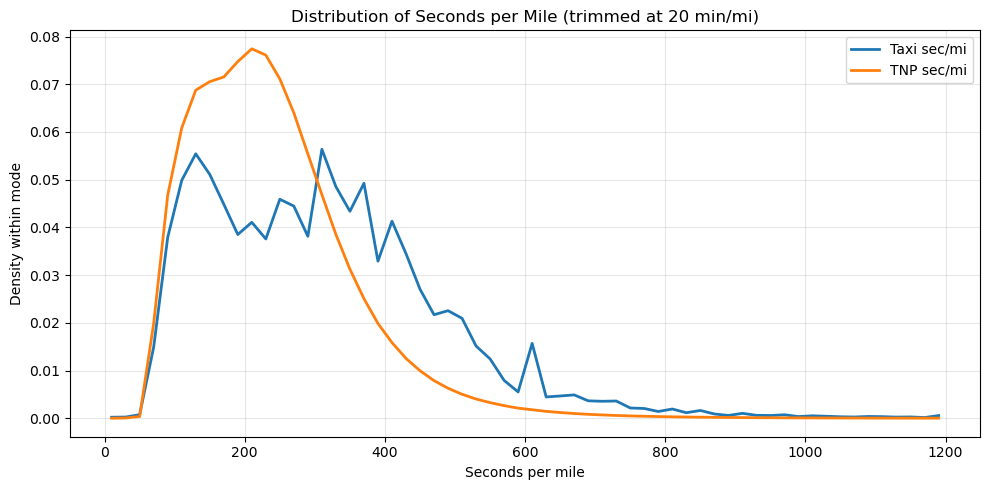

In [ ]:
from pyspark.sql import functions as F
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TAXI_PARQUET = "gs://qst843-team8-central1/processed/taxi_clean_parquet"
TNP_PARQUET  = "gs://qst843-team8-central1/processed/tnp_clean_parquet"

MIN_MILES = 0.5
MAX_MILES = 30.0
MIN_SECONDS = 60
MAX_SPM = 1200.0

MAX_BIN_EDGE = 20
TARGET_MILE_BIN = 2
TOP_N_COMMUNITIES = 15

COMMUNITY_CANDIDATES = ["pickup_community_area", "pickup_community", "community_area", "pickup_area"]

taxi = spark.read.parquet(TAXI_PARQUET)
tnp  = spark.read.parquet(TNP_PARQUET)

def pick_first_existing(df, candidates):
    cols = set([c.lower() for c in df.columns])
    for c in candidates:
        if c.lower() in cols:
            return c
    return None

def prep_minimal(df, mode_name):
    miles_col   = pick_first_existing(df, ["trip_miles"])
    seconds_col = pick_first_existing(df, ["trip_seconds"])
    comm_col    = pick_first_existing(df, COMMUNITY_CANDIDATES)

    if not miles_col or not seconds_col:
        raise ValueError(f"{mode_name}: required columns not found (trip_miles / trip_seconds).")

    base = (df
        .withColumn("trip_miles",   F.col(miles_col).cast("double"))
        .withColumn("trip_seconds", F.col(seconds_col).cast("double"))
        .filter(
            (F.col("trip_miles") >= MIN_MILES) & (F.col("trip_miles") <= MAX_MILES) &
            (F.col("trip_seconds") >= MIN_SECONDS)
        )
    )
    if comm_col:
        base = base.withColumn("community", F.col(comm_col).cast("string"))
    else:
        base = base.withColumn("community", F.lit("Unknown"))

    base = (base
        .withColumn("sec_per_mile", (F.col("trip_seconds") / F.col("trip_miles")).cast("double"))
        .withColumn("mph", (F.lit(3600.0) * F.col("trip_miles") / F.col("trip_seconds")).cast("double"))
        .filter( (F.col("sec_per_mile") > 0) & (F.col("sec_per_mile") <= MAX_SPM) )
        .withColumn("mode", F.lit(mode_name))
    )

    max_bin = int(MAX_BIN_EDGE)
    base = (base
        .withColumn("mile_bin_raw", F.floor(F.col("trip_miles")).cast("int"))
        .withColumn("mile_bin", F.when(F.col("mile_bin_raw") >= max_bin, F.lit(max_bin)).otherwise(F.col("mile_bin_raw")))
    )
    return base.select("mode","trip_miles","trip_seconds","sec_per_mile","mph","mile_bin","community")

taxi_s = prep_minimal(taxi, "Taxi")
tnp_s  = prep_minimal(tnp,  "TNP")
both   = taxi_s.unionByName(tnp_s)

overall = (both.groupBy("mode")
    .agg(
        F.count("*").alias("trips"),
        F.avg("trip_miles").alias("avg_miles"),
        F.avg("trip_seconds").alias("avg_seconds"),
        F.expr("percentile_approx(sec_per_mile, 0.5)").alias("median_sec_per_mile"),
        F.expr("percentile_approx(sec_per_mile, 0.9)").alias("p90_sec_per_mile"),
        F.avg("mph").alias("avg_mph")
    )
    .orderBy("mode")
).toPandas()

print("=== Overall time vs distance (robust trims applied) ===")
print(overall.to_string(index=False))

def spm_hist(df, col="sec_per_mile", n_bins=50, max_x=MAX_SPM):
    width = max_x / n_bins
    idx = F.floor(F.col(col) / F.lit(width)).cast("int")
    idx = F.when(idx >= n_bins, n_bins-1).otherwise(idx)
    binned = (df.withColumn("bin_idx", idx)
                .groupBy("bin_idx")
                .agg(F.count("*").alias("cnt")))
    total = binned.agg(F.sum("cnt").alias("total")).first()["total"]
    pdf = binned.orderBy("bin_idx").toPandas()
    if total and total > 0:
        pdf["density"] = pdf["cnt"] / total
    else:
        pdf["density"] = 0.0
    pdf["x"] = (pdf["bin_idx"] + 0.5) * width
    return pdf[["x","density"]]

taxi_hist = spm_hist(taxi_s, "sec_per_mile", n_bins=60, max_x=MAX_SPM)
tnp_hist  = spm_hist(tnp_s,  "sec_per_mile", n_bins=60, max_x=MAX_SPM)

plt.figure(figsize=(10,5))
plt.plot(taxi_hist["x"], taxi_hist["density"], linewidth=2, label="Taxi sec/mi")
plt.plot(tnp_hist["x"],  tnp_hist["density"],  linewidth=2, label="TNP sec/mi")
plt.title("Distribution of Seconds per Mile (trimmed at 20 min/mi)")
plt.xlabel("Seconds per mile")
plt.ylabel("Density within mode")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis**


This chart compares trip efficiency between taxis and TNPs (Uber/Lyft) by plotting the distribution of seconds per mile, a congestion-adjusted travel-speed measure. To remove noise from extreme cases, we trim at 20 minutes per mile. The distribution shows that TNP trips are generally clustered more tightly around ~75-350 sec/mile, or about 10–48 mph, while taxi trips display a broader spread with a heavier right-tail.

The graph indicates that taxis experience more frequent slow-moving conditions than TNPs do. This could be due to a variety of factors like, operational inefficiencies, types of trips or less real-time routing optimization. At the fastest end of the spectrum (under ~200 sec/mile), both modes behave similarly, suggesting comparable performance when traffic flows freely.

### **Critical Observations**

At a high level, TNP volume has far surpassed that of Taxis in the post-pandemic era, marking a paradigm shift from the dynamic present prior to March 2020.

While both modes offer virtually the same service and demonstrate *similar* behavior on volume-adjusted metrics, it is clear that TNPs have taken over as riders place a high value on its convenience and reliability, for which they are willing to pay *a little bit* more.


## **Conclusion**

**Q1 - Market Shift**

TNPs overtook taxis by a wide margin post-pandemic. Both crashed as a result of COVID, and only TNPs truly recovered. TNP’s pre-pandemic spikes need further investigation

* Stakeholder: Taxis

* Action: Improve service by offering enhanced scheduling capabilities and built-in route optimization software instead of relying on driver knowledge (Medium impact/High effort)

* Risks/Limits: Expensive software licensing/implementation. Lack of taxi company centralization limits potential for widespread adoption/impact.

* Next Steps: Explore vendors for scheduling app development. Identify the best GPS software that balances cost and accuracy.

**Q2 - Pricing**

TNPs have a higher base fare (8.10) than taxis (3.80) per ride, but lower rates per mile and minute. Taxis are, on average, cheaper for trips up to 15 miles, but the difference is negligible. Riders value TNPs’ convenience, giving taxis an edge in pricing with minimal impact on volume.

* Stakeholder: Riders

* Action: Choose taxis when immediately available for short trips. Choose TNPs in every other case, especially for trips over 15 miles (Medium impact/Low Effort)

* Risks/Limits: Slight increase in cost for short trips.

* Next Steps: Download and set up TNP apps like Uber and Lyft if you have not already.

**Q3 - Trip Distance**

Taxis see roughly 50% of their trips concentrated within 0-2 miles, while TNPs show a greater spread across distances, where the highest concentration is in trips between 2 and 6 miles. These trends likely exist because taxis focus on areas in the heart of the city where populations are highest, while TNPs can be summoned to areas outside urban hotspots.

* Stakeholder: Taxis

* Action: Expand target areas via scheduling software (High impact/High effort)

* Risks/Limits: Direct competition with TNPs, fuel costs, software cost/implementation

* Next Steps: Research expanding addressable area to balance increasing volume with increasing fuel costs. Explore vendors for scheduling app development.

**Q4 - Geography**

When combining the two modes, it is clear that a few major areas command the most rider volume: Loop, Near North Side, West Town, Lake View, O'Hare.

* Stakeholder: Uber Drivers

* Action: “Patrol” these top areas to reliably increase ride volume (High Impact/Low effort)

* Risks/Limits: Increased competition with taxis and other TNP drivers following the same advice. Miss out on large fares available in other areas. Riders in lower-volume areas may have fewer options.

* Next Steps: “Post up” in one or multiple of these areas on your next drive to see if profit is higher.

**Q5 - Efficiency**

The distribution of TNP seconds/mile concentrates at 200 and tails off sharply from there. The spread of taxi seconds/mile centers is broader, with a significant proportion creeping above 200, indicating that TNPs, driven by route-optimization algorithms, tend to be more efficient.

* Stakeholder: Taxis

* Action: Implement route optimization software (High Impact/Medium Effort) and discourage drivers from “freestyling.”

* Risks/Limits: Driver resistance and expensive software licensing/implementation.

* Next Steps: Identify the best GPS software that balances cost and accuracy, and gauge driver openness to change.

## **References**

1. Anthropic PBC. (n.d.). Claude.AI. Anthropic. https://www.anthropic.com/


2. City of Chicago. (2023, March 29). Transportation network providers - trips (2018 - 2022): City of Chicago: Data Portal. Chicago Data Portal. https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips-2018-2022-/m6dm-c72p/about_data


3. City of Chicago. (2024, February 7). Taxi trips (2013-2023): City of chicago: Data Portal. Chicago Data Portal. https://data.cityofchicago.org/Transportation/Taxi-Trips-2013-2023-/wrvz-psew/about_data


4. OpenAI. (n.d.). ChatGPT. OpenAI. https://openai.com/


5. Soltanieh Ha, M. (2025). BA843 E1 Big Data Analytics for Business (Fall 25). Lectures 1-9. Boston ; Boston University: Questrom School of Business.

## **Generative AI Disclosure**

1. We primarily used Gen AI for code optimization. While the code provided in the class notebooks established a strong foundation, it is not a one-size-fits-all solution for every dataset. Therefore, we leaned on *OpenAI’s ChatGPT* and *Anthropic’s Claude* to tailor code to our specific needs for cleaning and EDA. For example, we would write code/use some code from class, then ask the AI how it could be altered to best suit our goals and the characteristics of the dataset. It was also key in identifying errors and deepening our understanding of the dataset by feeding it errors and outputs.

2. We were also able to use it for improving coding efficiency. Specifically, since our datasets were similar, once we finished “Taxi”, we were able to ask it to reproduce that cleaning code in the context of “TNP”, while adding the lines to fix the “monetary column” formatting. Additionally, since our graphs had relatively similar in appearance, we could use the code from the first graph and say “modify this so it is a ____ graph with _____ on the x-axis, ____ on the y-axis, so we can see how ____ compares across the datasets" (Purely hypothetical example). Instead of manually typing new code or copying and pasting code and then modifying it, we were able to get exactly what we wanted in a fraction of the time.

3. AI fully generated the tables in the "Data description" We did this by screenshotting the data dictionary provided on the source website and then asking AI to “put it into a table format that would be easily visible in an .ipynb format.”

4. The Google Cloud Shell/CLI commands to extract the data from the source and land it in our bucket were created iteratively by trying different commands and then detailing the errors when the extraction would fail/timeout. This was an area where our team had virtually no experience, so having AI was a great tool for learning the process and ensuring it was completed in a timely manner.

5. We also used AI to check our understanding of our graph analysis. We would paste he graph and say things like “This is a graph showing ____ and we think it indicates ____. Is this an acceptable interpretation, or is there more we should consider?

6. AI fully created the table in Q2. Using a similar method to that used for generating the “Data Description” tables, we fed the AI the constants from the graph. We told it to “generate a table that is easily readable in an .ipynb markdown that shows the cost across modes at distances of 1, 2, 5, 10, 15, and 20 miles, assuming a speed of 15 mph.” This saved time executing the calculations and formatting the table, allowing us to strengthen our analysis with minimal additional effort.
